<a href="https://colab.research.google.com/github/gotkitsana/data-vi-with-python/blob/main/ann_data_vi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

import seaborn as sns

sns.set()

%config InlineBackend.figure_format = 'svg'

In [3]:
URL='https://drive.google.com/file/d/1AmIuxnuKF3Q2K0e-FqY49Jwa2YXXs9YA/view?usp=sharing'
path='https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path)



In [7]:
df.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a6ed4c4f0>,
      dtype=object)

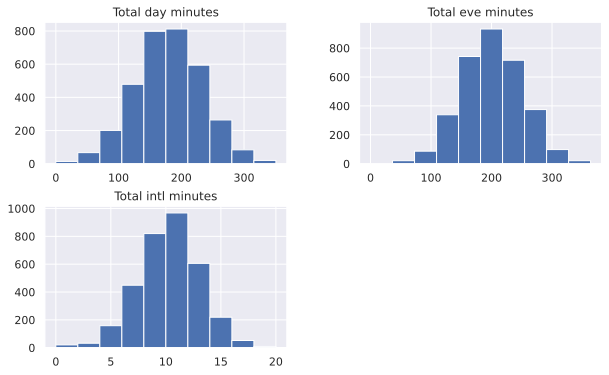

In [9]:
features = ['Total day minutes', 'Total eve minutes', 'Total intl minutes']
df[features].hist(figsize=(10, 6))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a6eed1ac0>],
      dtype=object)

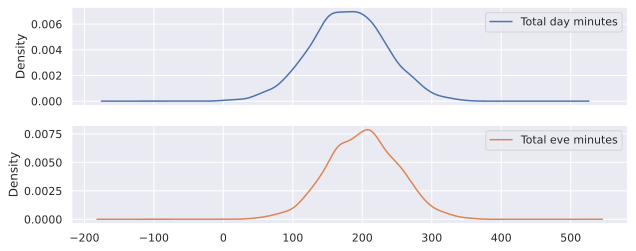

In [10]:
features = ['Total day minutes', 'Total eve minutes']
df[features].plot(
    kind='density', subplots=True, layout=(2,1), sharex=True, figsize=(10, 4)
)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


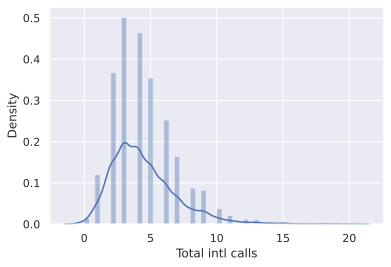

In [11]:
sns.distplot(df['Total intl calls'])

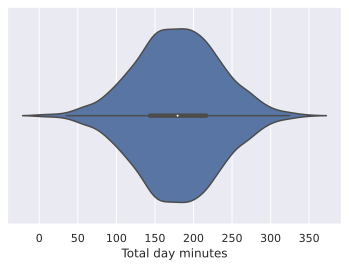

In [13]:
# sns.boxplot(x="Total intl calls", data=df)
sns.violinplot(x="Total day minutes", data=df)

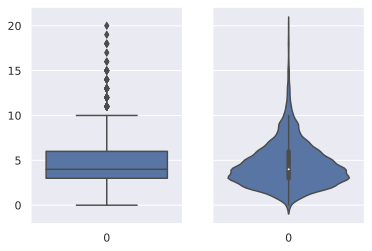

In [16]:
_, axes = plt.subplots(1,2, sharey=True, figsize=(6,4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1])

In [17]:
df[["Total intl calls"]].describe()

,Total intl calls
count,3333.000000
mean,4.479448
std,2.461214
min,0.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,20.000000


In [18]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

AxesSubplot(0.125,0.125;0.352273x0.755)


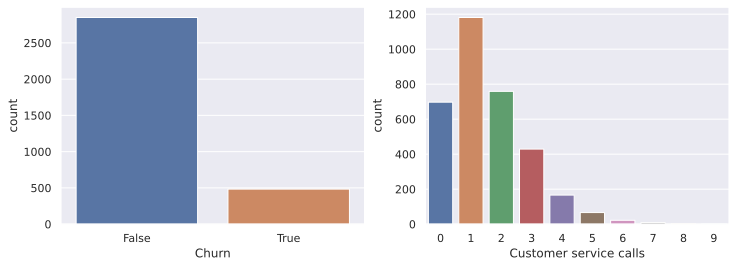

In [22]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1])

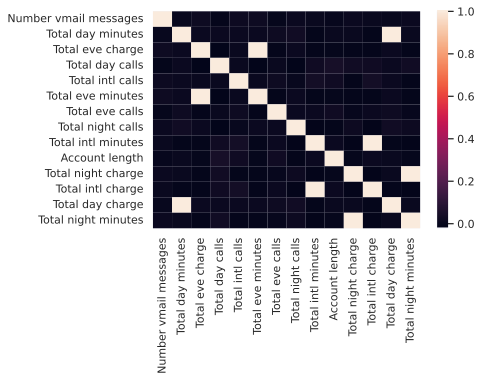

In [4]:
numerical = list(
    set(df.columns) - set(
        [
          "State",
          "International plan",
          "Voice mail plan",
         "Area code",
         "Churn",
         "Customer service calls"
        ]
    )
)

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

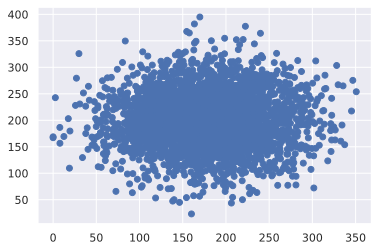

In [5]:
plt.scatter(df["Total day minutes"], df["Total night minutes"])

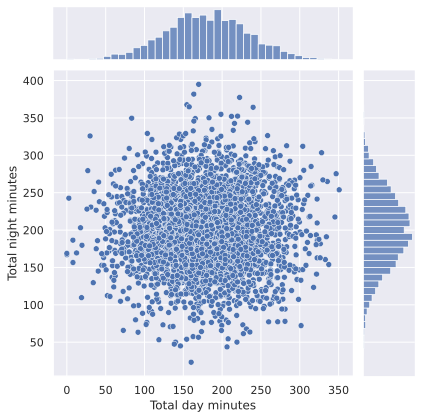

In [6]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter")

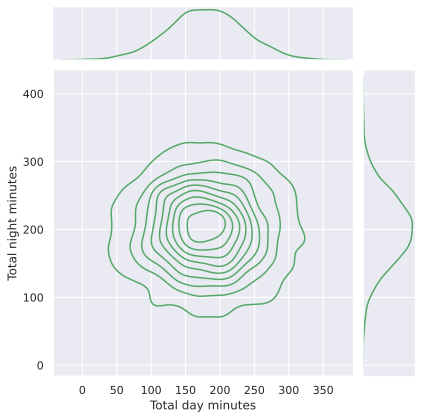

In [15]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="kde", color="g")

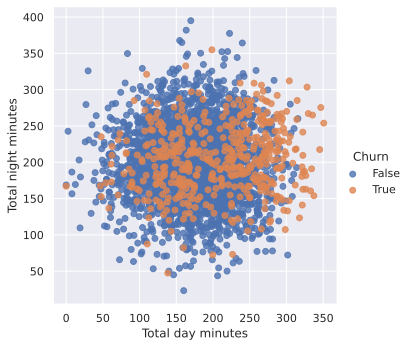

In [17]:
sns.lmplot(x="Total day minutes", y="Total night minutes", data=df, hue="Churn", fit_reg=False)